# Assignment - 16 (Neural Networks)

## 2. Gas Turbines
The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

1. Variable (Abbr.) Unit Min Max Mean
2. Ambient temperature (AT) C â€“6.23 37.10 17.71
3. Ambient pressure (AP) mbar 985.85 1036.56 1013.07
4. Ambient humidity (AH) (%) 24.08 100.20 77.87
5. Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
6. Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
7. Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
8. Turbine after temperature (TAT) C 511.04 550.61 546.16
9. Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
10. Turbine energy yield (TEY) MWH 100.02 179.50 133.51
11. Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
12. Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing

In [2]:
# importing dataset

data=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Assignments(Data Science)\16. Neural Networks\gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


#### EDA 

In [3]:
# Geting Information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
# Descriptive Satistics

data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [5]:
# checking duplicates in data
data[data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [6]:
# correlation in data
correlation=data.corr()
correlation

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


#### Visualization

<AxesSubplot:>

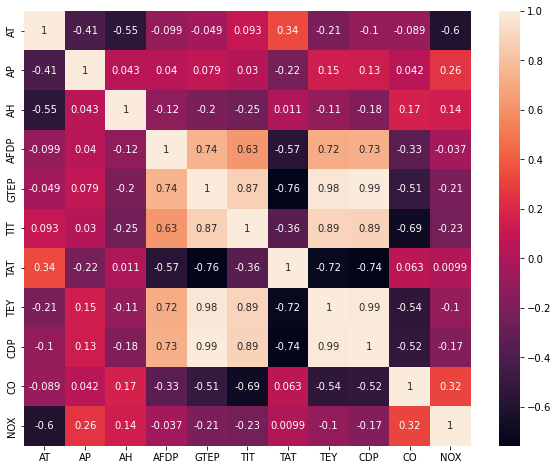

In [7]:
# creating heatmap by use of correlation

plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True)

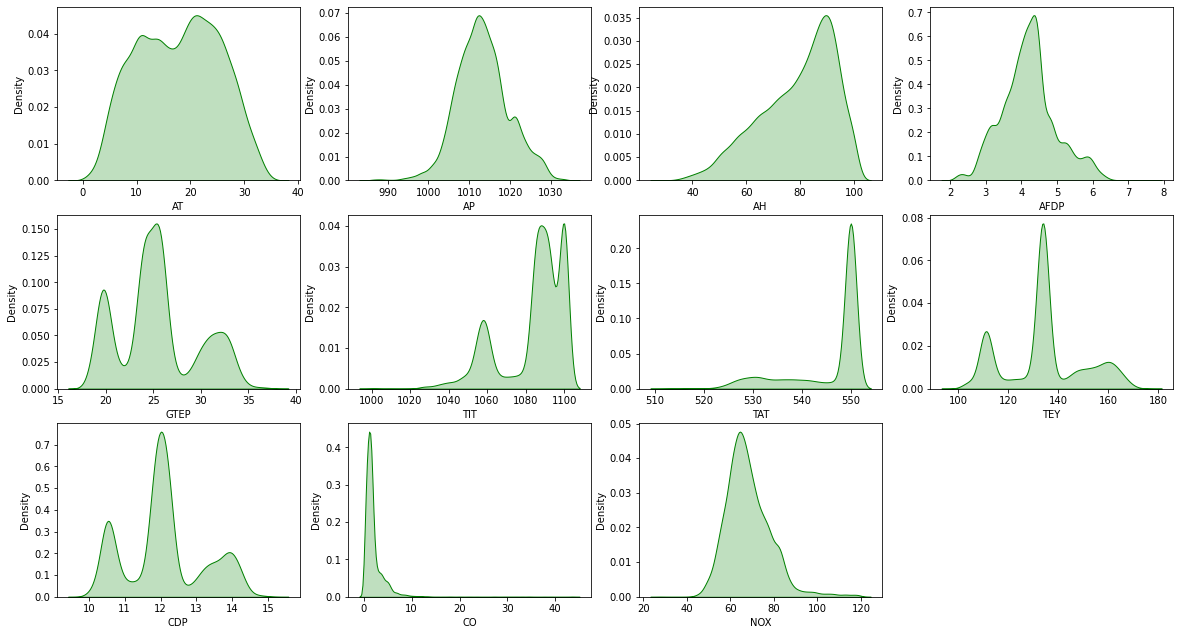

In [8]:
# KDE plot for numerical values

no_column = data.columns.tolist()

plt.figure(figsize=(20,30))
for i,column in enumerate(no_column,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data[column],color='g',shade=True)

([<AxesSubplot:title={'center':'NOX'}>,
  <AxesSubplot:title={'center':'NOX'}>,
  Text(0.5, 1.0, 'NOX')],
 [<AxesSubplot:xlabel='NOX'>, <AxesSubplot:xlabel='NOX'>])

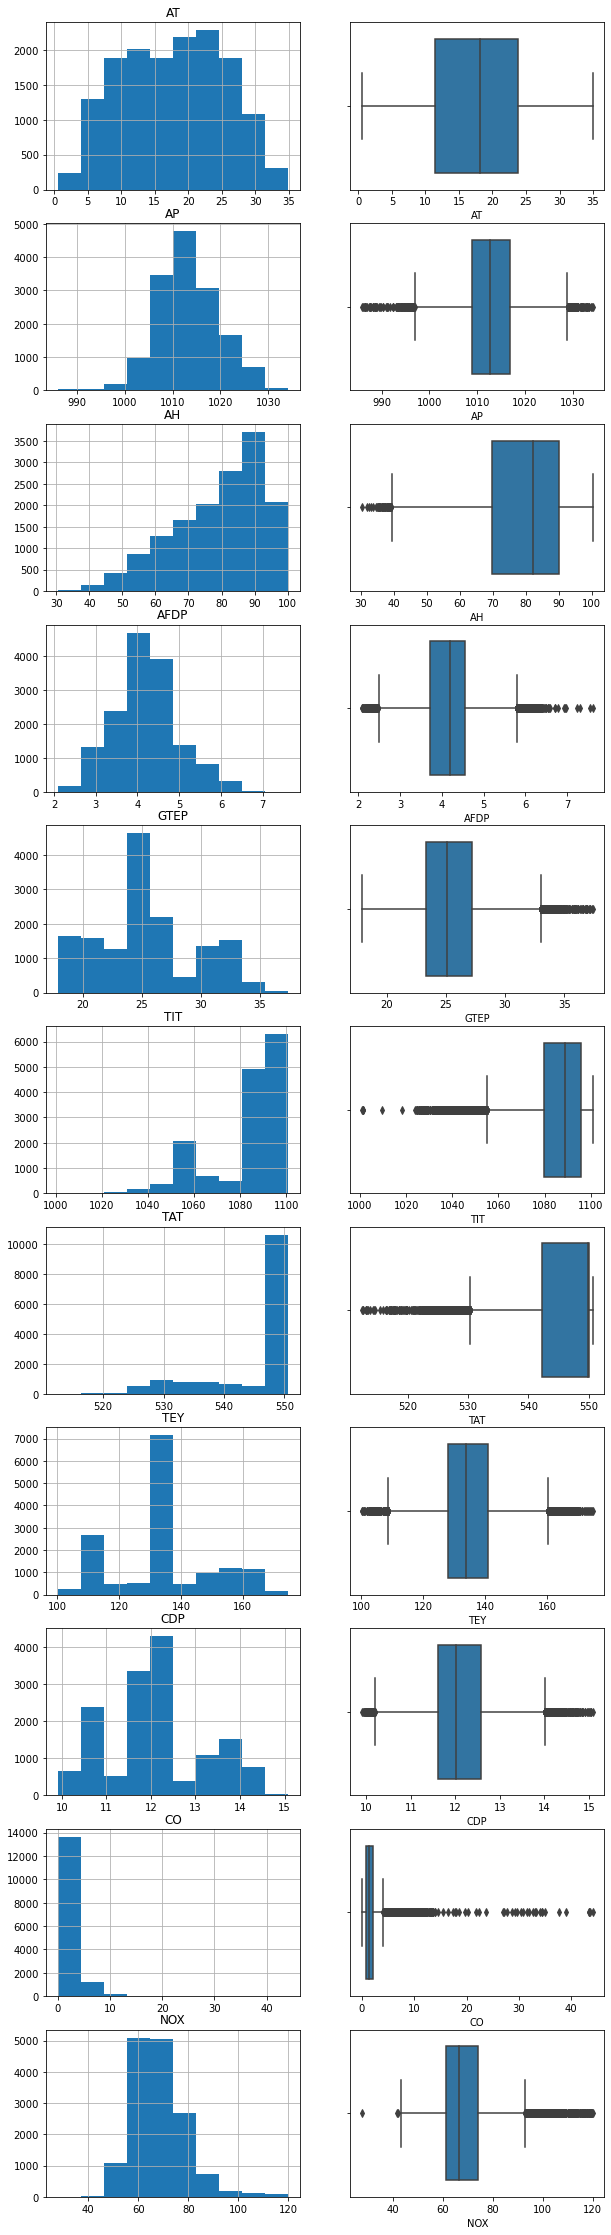

In [9]:
# Subplots and Boxplots
plt.subplots(figsize=(10,40))

[plt.subplot(11,2,1),data['AT'].hist(),plt.title("AT")],[plt.subplot(11,2,2),sns.boxplot(x=data["AT"])]
[plt.subplot(11,2,3),data['AP'].hist(),plt.title("AP")],[plt.subplot(11,2,4),sns.boxplot(x=data["AP"])]
[plt.subplot(11,2,5),data['AH'].hist(),plt.title("AH")],[plt.subplot(11,2,6),sns.boxplot(x=data["AH"])]
[plt.subplot(11,2,7),data['AFDP'].hist(),plt.title("AFDP")],[plt.subplot(11,2,8),sns.boxplot(x=data["AFDP"])]
[plt.subplot(11,2,9),data['GTEP'].hist(),plt.title("GTEP")],[plt.subplot(11,2,10),sns.boxplot(x=data["GTEP"])]

[plt.subplot(11,2,11),data['TIT'].hist(),plt.title("TIT")],[plt.subplot(11,2,12),sns.boxplot(x=data["TIT"])]

[plt.subplot(11,2,13),data['TAT'].hist(),plt.title("TAT")],[plt.subplot(11,2,14),sns.boxplot(x=data["TAT"])]

[plt.subplot(11,2,15),data['TEY'].hist(),plt.title("TEY")],[plt.subplot(11,2,16),sns.boxplot(x=data["TEY"])]

[plt.subplot(11,2,17),data['CDP'].hist(),plt.title("CDP")],[plt.subplot(11,2,18),sns.boxplot(x=data["CDP"])]

[plt.subplot(11,2,19),data['CO'].hist(),plt.title("CO")],[plt.subplot(11,2,20),sns.boxplot(x=data["CO"])]

[plt.subplot(11,2,21),data['NOX'].hist(),plt.title("NOX")],[plt.subplot(11,2,22),sns.boxplot(x=data["NOX"])]

In [10]:
x = data.iloc[:,0:12]
y = data['TEY']

In [11]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [12]:
# dropping TEY column
x=x.drop(["TEY"],axis=1)

In [13]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [14]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [15]:
# fix random seed for reproducibility
seed = 10
np.random.seed(seed)

#### Creating a model with ["relu" and "sigmoid"]

In [16]:
model = Sequential() # 0 level
model.add(Dense(25, input_dim=10,  activation='relu')) #1st layer
model.add(Dense(25,  activation='relu')) #2nd layer
model.add(Dense(25, activation='sigmoid')) #3rd layer or op layer
model.add(Dense(25, activation='tanh')) #4rd layer or op layer
model.add(Dense(25, activation='leaky_relu')) #5rd layer or op layer

In [17]:
# Compile model

model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_percentage_error'])
model

In [18]:
# Fit the model

fil_model=model.fit(x, y, validation_split=0.30, epochs=50, batch_size=30)

Epoch 1/50
351/351 [==============================] - 2s 3ms/step - loss: 17222.6992 - mean_absolute_percentage_error: 96.1060 - val_loss: 14845.9014 - val_mean_absolute_percentage_error: 91.9641
Epoch 2/50
351/351 [==============================] - 1s 2ms/step - loss: 14755.2324 - mean_absolute_percentage_error: 88.7399 - val_loss: 12715.7080 - val_mean_absolute_percentage_error: 84.8962
Epoch 3/50
351/351 [==============================] - 1s 3ms/step - loss: 12697.8799 - mean_absolute_percentage_error: 82.0981 - val_loss: 10860.4570 - val_mean_absolute_percentage_error: 78.2307
Epoch 4/50
351/351 [==============================] - 1s 2ms/step - loss: 10882.1836 - mean_absolute_percentage_error: 75.7686 - val_loss: 9218.4238 - val_mean_absolute_percentage_error: 71.8266
Epoch 5/50
351/351 [==============================] - 1s 2ms/step - loss: 9267.9346 - mean_absolute_percentage_error: 69.6625 - val_loss: 7762.7056 - val_mean_absolute_percentage_error: 65.6391
Epoch 6/50
351/351 [===

351/351 [==============================] - 1s 3ms/step - loss: 254.8841 - mean_absolute_percentage_error: 8.6641 - val_loss: 245.6174 - val_mean_absolute_percentage_error: 9.6072
Epoch 44/50
351/351 [==============================] - 1s 3ms/step - loss: 254.8569 - mean_absolute_percentage_error: 8.6385 - val_loss: 244.9317 - val_mean_absolute_percentage_error: 9.5725
Epoch 45/50
351/351 [==============================] - 1s 2ms/step - loss: 254.8708 - mean_absolute_percentage_error: 8.6027 - val_loss: 245.6774 - val_mean_absolute_percentage_error: 9.6102
Epoch 46/50
351/351 [==============================] - 1s 3ms/step - loss: 254.8486 - mean_absolute_percentage_error: 8.6511 - val_loss: 243.9252 - val_mean_absolute_percentage_error: 9.5205
Epoch 47/50
351/351 [==============================] - 1s 3ms/step - loss: 254.8544 - mean_absolute_percentage_error: 8.5926 - val_loss: 246.7481 - val_mean_absolute_percentage_error: 9.6634
Epoch 48/50
351/351 [==============================] - 1s

In [19]:
# Evaluating the Model

score = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: 251.5913 - mean_absolute_percentage_error: 8.8362
mean_absolute_percentage_error: 883.62%


In [20]:
# Visualzation of Training History, score and metric name

model.metrics_names, score ,fil_model.history.keys()

(['loss', 'mean_absolute_percentage_error'],
 [251.5912628173828, 8.83620548248291],
 dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error']))

In [21]:
fil_model.history['mean_absolute_percentage_error']  # just for understand

[96.10596466064453,
 88.73987579345703,
 82.09811401367188,
 75.76862335205078,
 69.66249084472656,
 63.75157928466797,
 58.03392028808594,
 52.486820220947266,
 47.12556457519531,
 41.93416213989258,
 36.92530059814453,
 32.12016677856445,
 27.53265953063965,
 23.183515548706055,
 19.188182830810547,
 16.18880844116211,
 14.09662914276123,
 12.364276885986328,
 10.964537620544434,
 9.844523429870605,
 9.00658130645752,
 8.434408187866211,
 8.223071098327637,
 8.35954761505127,
 8.497538566589355,
 8.568805694580078,
 8.603608131408691,
 8.62195873260498,
 8.660701751708984,
 8.58608341217041,
 8.611207962036133,
 8.641911506652832,
 8.623329162597656,
 8.626055717468262,
 8.629854202270508,
 8.625642776489258,
 8.639556884765625,
 8.633139610290527,
 8.599587440490723,
 8.623024940490723,
 8.648113250732422,
 8.576119422912598,
 8.66408634185791,
 8.638469696044922,
 8.602723121643066,
 8.651083946228027,
 8.59255313873291,
 8.656476020812988,
 8.616737365722656,
 8.635252952575684]

In [22]:
fil_model.history['val_mean_absolute_percentage_error']  # just for understand

[91.964111328125,
 84.89618682861328,
 78.23068237304688,
 71.82656860351562,
 65.63912200927734,
 59.651451110839844,
 53.84529495239258,
 48.22867202758789,
 42.78170394897461,
 37.52732849121094,
 32.46846008300781,
 27.62604331970215,
 23.011260986328125,
 18.721412658691406,
 14.995469093322754,
 13.03955078125,
 11.820465087890625,
 10.880555152893066,
 10.175760269165039,
 9.671927452087402,
 9.333313941955566,
 9.131559371948242,
 9.22701644897461,
 9.40961742401123,
 9.520684242248535,
 9.581633567810059,
 9.608185768127441,
 9.61267375946045,
 9.563302040100098,
 9.594379425048828,
 9.640604019165039,
 9.623403549194336,
 9.630967140197754,
 9.636235237121582,
 9.609342575073242,
 9.62863540649414,
 9.557455062866211,
 9.532035827636719,
 9.621313095092773,
 9.663415908813477,
 9.529119491577148,
 9.718859672546387,
 9.607230186462402,
 9.572457313537598,
 9.610241889953613,
 9.520452499389648,
 9.66342830657959,
 9.514594078063965,
 9.595063209533691,
 9.52231216430664]

In [23]:
fil_model.history['loss']  # just for understand

[17222.69921875,
 14755.232421875,
 12697.8798828125,
 10882.18359375,
 9267.9345703125,
 7833.25927734375,
 6562.0,
 5441.49951171875,
 4460.56103515625,
 3609.87255859375,
 2880.6806640625,
 2264.39013671875,
 1752.5306396484375,
 1336.368896484375,
 1007.0098876953125,
 754.690673828125,
 569.2689208984375,
 439.809814453125,
 355.0855712890625,
 303.98193359375,
 276.2724609375,
 262.8899841308594,
 257.3273620605469,
 255.4802703857422,
 254.96893310546875,
 254.85494995117188,
 254.83468627929688,
 254.83486938476562,
 254.82769775390625,
 254.85765075683594,
 254.85121154785156,
 254.8623809814453,
 254.86216735839844,
 254.8492889404297,
 254.85214233398438,
 254.8912353515625,
 254.87936401367188,
 254.86207580566406,
 254.88809204101562,
 254.8616943359375,
 254.85389709472656,
 254.82957458496094,
 254.88412475585938,
 254.85693359375,
 254.8708038330078,
 254.8485870361328,
 254.8544464111328,
 254.85812377929688,
 254.84033203125,
 254.88919067382812]

In [24]:
fil_model.history['val_loss']  # just for understand

[14845.9013671875,
 12715.7080078125,
 10860.45703125,
 9218.423828125,
 7762.70556640625,
 6476.33203125,
 5343.87548828125,
 4356.05810546875,
 3499.215087890625,
 2767.03125,
 2149.6513671875,
 1639.1458740234375,
 1225.873779296875,
 901.3101806640625,
 655.520751953125,
 478.3039245605469,
 359.1050109863281,
 285.8829650878906,
 246.98280334472656,
 231.27513122558594,
 229.0966796875,
 232.9394073486328,
 238.00010681152344,
 241.83380126953125,
 243.92979431152344,
 245.1116180419922,
 245.6363525390625,
 245.7257537841797,
 244.75299072265625,
 245.36276245117188,
 246.285400390625,
 245.93983459472656,
 246.09144592285156,
 246.19735717773438,
 245.6593475341797,
 246.04454040527344,
 244.639404296875,
 244.14796447753906,
 245.89796447753906,
 246.74766540527344,
 244.09170532226562,
 247.8897705078125,
 245.6173553466797,
 244.93165588378906,
 245.6774444580078,
 243.9251708984375,
 246.7480926513672,
 243.81272888183594,
 245.37625122070312,
 243.9608612060547]

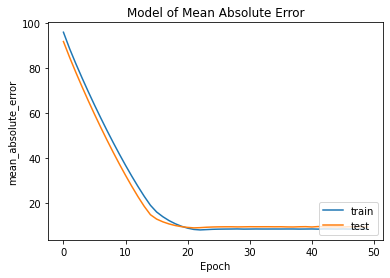

In [25]:
# # summarizaion of history for accuracy

plt.plot(fil_model.history['mean_absolute_percentage_error'])
plt.plot(fil_model.history['val_mean_absolute_percentage_error'])
plt.title('Model of Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('mean_absolute_error')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

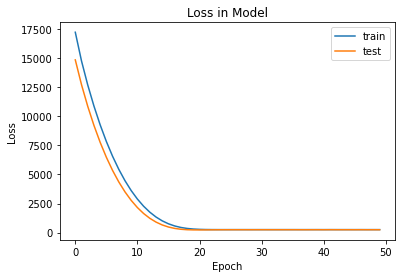

In [26]:
# # summarization of history for 'loss'

plt.plot(fil_model.history['loss'])
plt.plot(fil_model.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()